------
CL - CD curve [unit tests]

In [1]:
from CL_CD_curve import rho_calculation, CL_coefficient, CD_coefficient

c:\Users\moheb\Desktop\Y3\SVV Flight\B46\path_config.py:5: SyntaxWarning: invalid escape sequence '\D'
  data_dict_unfiltered_path = abs_project_path + "\Data_dict_SIunits.pkl"
c:\Users\moheb\Desktop\Y3\SVV Flight\B46\path_config.py:9: SyntaxWarning: invalid escape sequence '\D'
  data_dict_path = abs_project_path + "\Data_dict_SIunits.pkl"


Data dictionary path = c:\Users\moheb\Desktop\Y3\SVV Flight\B46\Data_dict_SIunits.pkl
e is =========> 0.8960008934257289


In [5]:
def test_rho_calculation_zero_values():
    """Test rho calculation handles zero values gracefully."""
    try:
        rho_calculation(0, 0, 0)
        # If no exception is raised, the test should fail.
        print("Test failed: ValueError was not raised.")
    except ValueError:
        # If a ValueError is raised, the test passes.
        print("Test passed: ValueError raised as expected.")



###############

    
def test_CL_coefficient_with_mass_increase():
    """Test CL coefficient with increased mass and decreased S and V_TAS."""
    # Assuming some test values; these need to be adjusted to your specific case.
    mi = 7000  # Increased mass
    rho = 1.225
    S = 25  # Decreased surface area
    V_TAS = 100  # Decreased true airspeed
    # Expected value needs calculation
    expected_CL = (mi*2)*9.81/(0.5*rho*S*V_TAS**2)
    calculated_CL = CL_coefficient(mi, rho, S, V_TAS)
    assert expected_CL > calculated_CL

    print("Test of CL coefficient with increased mass passed successfully.")



def test_CL_coefficient_decrease_with_S():
    T = 300  # Increased temperature
    rho = 1.225
    S = 30
    V_TAS = 150
    m0 = 6082.91
    S = 30.00
    R = 287
    a = -6.5*10**(-3)
    g = 9.80665
    T0 = 288.15
    P0 = 101325
    A = 8.43866
    # expected_CL_increase = True
    initial_CL = CL_coefficient(T, rho, S, V_TAS)
    new_CL = CL_coefficient(T, rho, S-10, V_TAS)

    assert new_CL > initial_CL # == expected_CL_increase
    print("Test passed: Increase in Cl for an decrease in S.")

def test_CL_coefficient_decrease_with_vtas():
    T = 300  # Increased temperature
    rho = 1.225
    S = 30
    V_TAS = 150
    m0 = 6082.91
    S = 30.00
    R = 287
    a = -6.5*10**(-3)
    g = 9.80665
    T0 = 288.15
    P0 = 101325
    A = 8.43866
    expected_CL_increase = True
    initial_CL = CL_coefficient(T, rho, S, V_TAS)
    new_CL = CL_coefficient(T, rho, S, V_TAS-20)
    assert new_CL > initial_CL
# Additional tests like e value verification and linear relationships go here.
    print("Test passed: Increase in Cl for an decrease in Vtas.")

#############################

def test_CD_coefficient_increase_with_temperature():
    """Ensure CD increases with temperature increase."""
    # This requires specific values and expected outcomes.
    T = 300  # Increased temperature
    rho = 1.225
    S = 30
    V_TAS = 150
    # Expected CD needs to be calculated based on expected behavior
    # expected_CD_increase = True
    initial_CD = CD_coefficient(T, rho, S, V_TAS)
    # Simulate temperature increase
    new_CD = CD_coefficient(T+10, rho, S, V_TAS)
    assert new_CD > initial_CD #= expected_CD_increase
    print("Test passed: Increase in Cd for an increase in T.")

In [7]:
test_rho_calculation_zero_values()

ZeroDivisionError: division by zero

In [8]:
test_CD_coefficient_increase_with_temperature()

Test passed: Increase in Cd for an increase in T.


In [9]:
test_CL_coefficient_with_mass_increase()

Test of CL coefficient with increased mass passed successfully.


In [10]:
test_CL_coefficient_decrease_with_vtas()

Test passed: Increase in Cl for an decrease in Vtas.


In [11]:
test_CL_coefficient_decrease_with_S()

Test passed: Increase in Cl for an decrease in S.


----
Elevator Trim Cruve [unit tests]

In [12]:
from elevator_trim_curve import Trim_Curve

In [21]:
import path_config

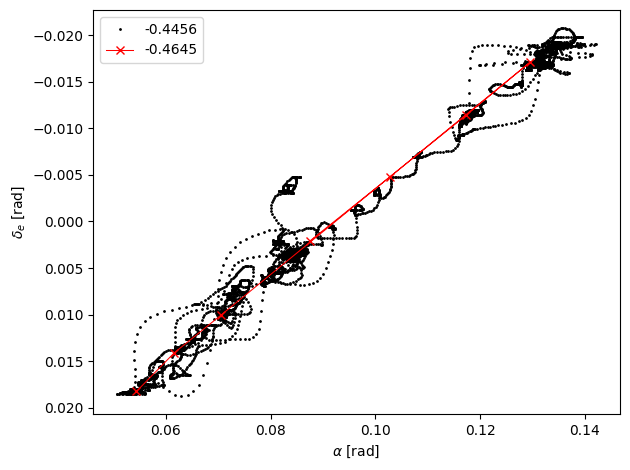

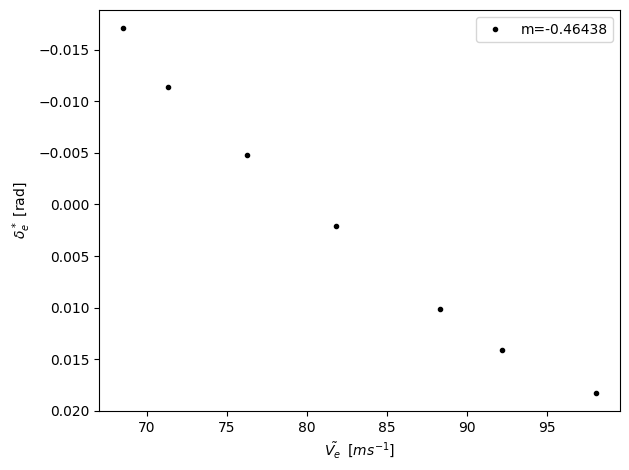

trim curve slope: dde_dalpha = -0.4644598173801486, elevator effectiveness: Cmde = -1.2468131626965393, static stability: dCm/dalpha = -0.5790946138532002


In [22]:

if __name__ == "__main__":
    mTimes = np.array([35, 37, 39, 41, 43, 44, 46]) * 60.
    calculator = Trim_Curve(data_file=path_config.data_dict_path)
    dde_dalpha = calculator.calc_meas_elTrim(equilibrium_times = mTimes)
    #TODO set dxcg to correct value
    Cmde = calculator.calc_Cmde(times=(48 * 60, 50 * 60))
    Cmalpha = calculator.calc_Cmalpha(Cmde=Cmde, dde_dalpha=dde_dalpha)
    calculator.plot_reduced_elTrim(Cmde=Cmde, equilibrium_times=mTimes)
    print(f'trim curve slope: dde_dalpha = {dde_dalpha}, elevator effectiveness: Cmde = {Cmde}, static stability: dCm/dalpha = {Cmalpha}')



In [13]:
Trim_object = Trim_Curve("Our_data/Our_Data_Dict.pkl")#/, (10,5) )

In [14]:
def test_deltae_increase_with_cg():

    Trim_object_for_test_0 = Trim_Curve("Our_data/Our_Data_Dict.pkl")#, (37*60 + 20 + 9, 37*60 + 28 + 9) )
    delta_e_normal_cg = Trim_object_for_test_0.delta_e
    delta_e_normal_cg = delta_e_normal_cg[37*60 + 25 + 9]

    Trim_object_for_test_1 = Trim_Curve("Our_data/Our_Data_Dict.pkl")#, (40*60 + 15 + 9, 40*60 + 18 + 9) )
    delta_e_shifted_cg = Trim_object_for_test_1.delta_e
    delta_e_shifted_cg = delta_e_shifted_cg[40*60 + 15 + 9]

    # print(delta_e_normal_cg[37*60 + 26 + 9])
    # print(delta_e_shifted_cg[40*60 + 16 + 9])

    #assert delta_e_normal_cg[37*60 + 26 + 9] > delta_e_shifted_cg[40*60 + 16 + 9] # == expected_CL_increase
    assert delta_e_normal_cg > delta_e_shifted_cg
    print("Test passed: Increase in Cl for an decrease in S.")

In [15]:
test_deltae_increase_with_cg()


Test passed: Increase in Cl for an decrease in S.


In [16]:
import numpy as np

In [17]:
# eq_times = np.array([27*60 + 16 + 9 -1,
#                      29*60 + 0 + 9 -1,
#                      30*60 + 50 + 9 -1,
#                      32*60 + 30 + 9 -1,
#                      34*60 + 10 + 9 -1,
#                      37*60 + 28 + 9 -1])

Cmde = Trim_object.calc_Cmde((37*60 + 27 + 9, 40*60 + 17 + 9))

# Trim_object.plot_reduced_elTrim(eq_times, cmde)

In [18]:
eq_times = np.array([27*60 + 16 + 9 -1,
                     29*60 + 0 + 9 -1,
                     30*60 + 50 + 9 -1,
                     32*60 + 30 + 9 -1,
                     34*60 + 10 + 9 -1,
                     37*60 + 28 + 9 -1])

In [19]:
Trim_object.plot_reduced_elTrim(eq_times, Cmde)

c:\Users\moheb\Desktop\Y3\SVV Flight\B46\elevator_trim_curve.py:109: RuntimeWarning: invalid value encountered in sqrt
  V_e = self.V_t*np.sqrt(rho/self.rho_0)


ValueError: operands could not be broadcast together with shapes (44331,) (50261,) 

------
# Unit tests for simulation

In [ ]:
!pip3.12 install control

In [ ]:
import model